In [26]:
import cv2
from datetime import datetime
import os
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from scipy import ndimage
import skimage.color as sc
import numpy as np
import skimage
from scipy.ndimage import gaussian_filter as gauss


img = ''
sigma = 5 # 1, 3, 5, 10, 20
kernel_size = 3 

roi_img = np.zeros_like(img)

def gaussBlur( img):
        return cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0)
    
def Sobel( img):
        sobelx_img = cv2.Sobel(gaussBlur(img), ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
        sobelx_img = np.uint8(np.absolute(sobelx_img))
        return sobelx_img

def Laplaciano(img):
        laplacian_img = cv2.Laplacian(gaussBlur(img), ddepth=cv2.CV_64F, ksize=3)
        return laplacian_img

def Canny(img):
        canny_img = cv2.Canny(gaussBlur(img), threshold1=90, threshold2=150)
        return canny_img


def pipeline(img):
        gauss_blur = gaussBlur(img)
        canny_filter = Canny(gauss_blur)
        img_mask = RoiFilter(canny_filter)
        return img_mask
    
def displayImage( img):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(111)
        ax.imshow(img, cmap='gray')

def RoiFilter(img):
        roi_img = np.zeros_like(img)
        roi_img1 = cv2.fillPoly(roi_img, vertices, 255)
        roi_mask = cv2.bitwise_and(img, roi_img1)
        return roi_mask

def Erosion(img):
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.dilate(img, kernel, 4)
        return erosion

def Hough(img):
        rho = 1
        theta = np.pi/200
        threshold = 5
        min_line_len = 1
        max_line_gap = 1
        img_maks = pipeline(img)
        lines = cv2.HoughLinesP(img_maks, rho, theta, threshold,
                                        np.array([]), minLineLength=min_line_len,
                                        maxLineGap=max_line_gap)
        img_lines = np.zeros((img_maks.shape[0], img_maks.shape[1], 3), dtype=np.uint8)
        for line in lines:
                for x1,y1,x2,y2 in line:
                        cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 2)
        
        print(lines)
        return img_lines


In [27]:

img = cv2.imread('../../Images_auto/image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
img_arr = np.asarray(img_gray)

#displayImage(Canny(img_gray))

()

()

In [28]:
img_arr.shape

(64, 128)

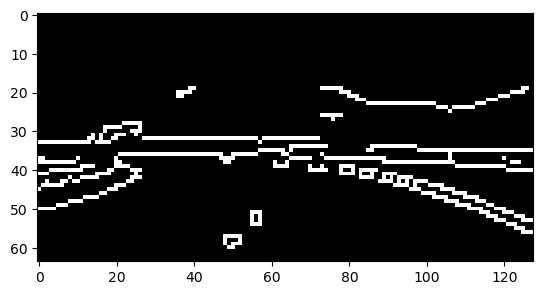

In [33]:
vertices =np.array([[(0,64),(0,37),(110,37),(120,64)]], dtype=np.int64)
roi_img = np.zeros_like(img_gray)
#erosion = Erosion(img_gray)
#gauss_img = gaussBlur(img_gray)
#gauss_img = gaussBlur(erosion)
canny_img = Canny(img_gray)
#sobel_img = Sobel(canny_img)

#cv2.fillPoly(roi_img, vertices, 255)
img_mask = cv2.bitwise_and(canny_img, roi_img)
plt.imshow(canny_img, cmap='gray')


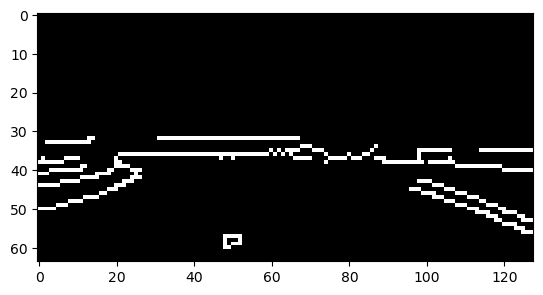

In [30]:
plt.imshow(canny_img, cmap='gray')

[[[  2  41  10  41]]

 [[ 88  39 106  39]]

 [[  2  49   4  48]]

 [[106  44 108  44]]

 [[  9  39  13  39]]

 [[107  40 111  40]]

 [[ 65  38  71  38]]

 [[ 15  43  21  40]]

 [[ 90  37 109  37]]

 [[ 15  48  16  48]]

 [[ 14  46  23  41]]

 [[ 16  47  17  47]]

 [[109  45 111  45]]

 [[  0  45  11  44]]

 [[ 74  38  75  38]]

 [[100  47 114  52]]

 [[ 12  43  14  43]]

 [[ 50  56  53  58]]

 [[ 26  39  26  43]]

 [[  0  51   8  50]]

 [[114  50 115  50]]

 [[ 79  37  82  38]]

 [[ 18  38  19  38]]

 [[ 22  37  25  39]]

 [[ 95  44 101  42]]

 [[ 95  46  96  46]]

 [[ 47  59  48  60]]

 [[ 21  45  25  44]]

 [[  3  49   8  47]]

 [[  4  43   5  43]]

 [[ 10  37  11  38]]

 [[ 20  37  22  38]]

 [[ 11  37  12  38]]

 [[ 76  38  79  38]]

 [[ 12  49  14  48]]

 [[ 48  57  49  56]]

 [[  9  49  11  49]]

 [[  2  37   5  37]]

 [[  1  43   3  43]]

 [[104  43 105  43]]

 [[ 97  46  98  47]]

 [[  0  39   1  39]]

 [[ 10  47  12  46]]

 [[ 19  46  21  46]]

 [[ 99  47 101  48]]

 [[112  46

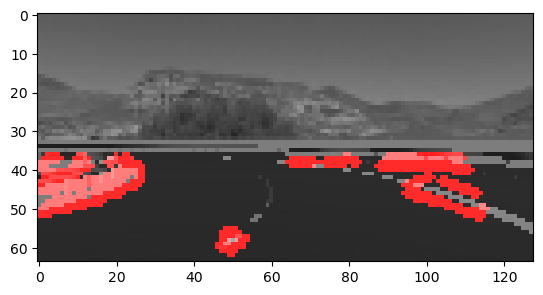

In [31]:

alpha = 1
beta = 1
gamma = 1
img_lane_lines = cv2.addWeighted(rgb_image, alpha, Hough(img_mask), beta, gamma)
plt.imshow(img_lane_lines)